In [ ]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth
!pip install midi2audio
!pip install pretty_midi
!pip install librosa

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libevdev2 libfluidsynth3 libgudev-1.0-0 libinput-bin
  libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a libqt5dbus5
  libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libxcb-icccm4 libxcb-image0 libxcb-keysyms1
  libxcb-render-util0 libxcb-util1 libxcb-xinerama0 libxcb-xinput0 libxcb-xkb1
  libxkbcommon-x11-0 qsynth qt5-gtk-platformtheme qttranslations5-l10n
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs qt5-image-formats-plugins qtwayland5 jackd
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libevdev2 libfluidsynth3 libgudev-1.0-0
  libinput-bin libinput10 libinstpatch-1.0-2 libmd4c0 libmtdev1 libqt5core5a
  libqt5dbus5 libqt5gui5 libqt5network5 libqt5svg5 libqt5widgets5 libwacom-bin
  libwacom-common libwacom9 libx

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import librosa
import pretty_midi
import midi2audio
import fluidsynth
import mido
import collections

from IPython import display

%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 42
np.random.seed(seed)
_SAMPLING_RATE = 16000
sample_file = '/content/drive/MyDrive/THESIS/bthvn_s14_mv1.mid'
source = '/content/drive/MyDrive/THESIS'
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

pm = pretty_midi.PrettyMIDI(sample_file)
display_audio(pm)

In [ ]:
from midi2audio import FluidSynth

# FluidSynth().play_midi(r'D:\UNI\Thesis\NeuralNotes\JESU1.MID')
fs = FluidSynth(sample_rate=_SAMPLING_RATE)
fs.midi_to_audio(sample_file, '/content/bthvn_s14_mv1.wav')

# Auidio Representation

In [ ]:
y, sr = librosa.load('/content/bthvn_s14_mv1.wav')

In [ ]:
print(f'Len y: {len(y)}')
print(f'Content y :\n{y}')

Len y: 8086088
Content y :
[-3.1821255e-05 -3.2583397e-05 -2.4909637e-05 ...  6.7924236e-07
 -1.3413886e-07 -4.4954086e-07]


In [ ]:
sr

22050

## Spectrogram

In [ ]:
D = librosa.stft(y)  # STFT of y
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

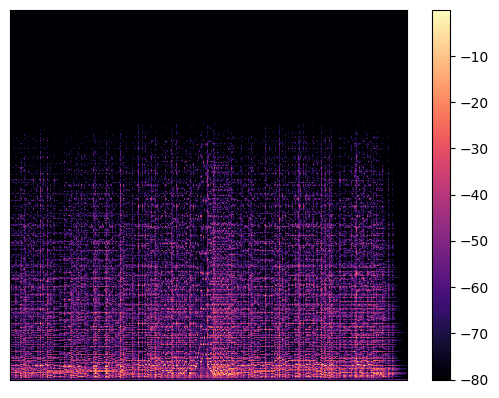

In [ ]:
plt.figure()
librosa.display.specshow(S_db)
plt.colorbar()
plt.savefig(f'{source}/spectrogram.png')
plt.show()

## Waveform

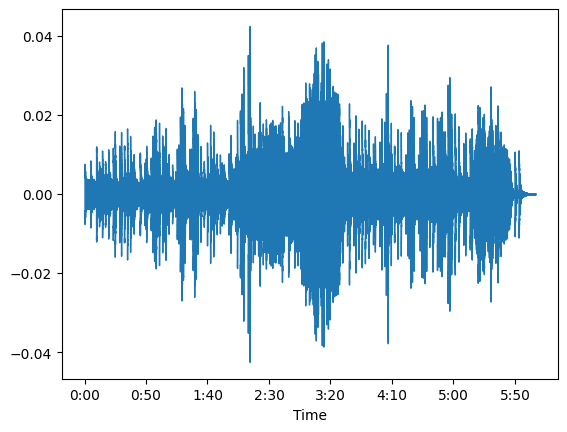

In [ ]:
librosa.display.waveshow(y, sr=sr)
plt.savefig(f'{source}/waveform.png')
plt.show()

## Chromagram

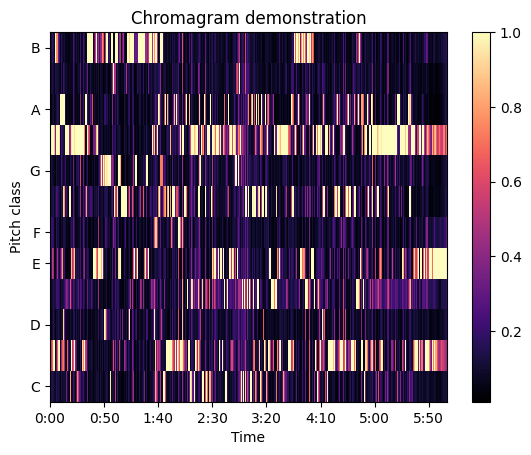

In [ ]:
chroma = librosa.feature.chroma_cqt(y=y, sr=sr)
fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram demonstration')
fig.colorbar(img, ax=ax)
plt.savefig(f'{source}/chromagram.png')
plt.show()

# Symbolic Representation

## MIDI

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=56, note_name=G#3, duration=0.4041
1: pitch=61, note_name=C#4, duration=0.4041
2: pitch=64, note_name=E4, duration=0.4041
3: pitch=56, note_name=G#3, duration=0.3979
4: pitch=61, note_name=C#4, duration=0.3928
5: pitch=64, note_name=E4, duration=0.3878
6: pitch=56, note_name=G#3, duration=0.3830
7: pitch=61, note_name=C#4, duration=0.3830
8: pitch=64, note_name=E4, duration=0.3830
9: pitch=56, note_name=G#3, duration=0.3830


In [ ]:
mido_data = mido.MidiFile(sample_file)
# print(f'Track: {mido_data.tracks[1].name}')
# for message in mido_data.tracks[1][:100]:
#     print(message)
mido_data

MidiFile(type=0, ticks_per_beat=480, tracks=[
  MidiTrack([
    MetaMessage('track_name', name='Sonata No.14 in cis-Moll, Op. 27/2 - 1. Satz', time=0),
    MetaMessage('track_name', name='Mondscheinsonate; der Gräfin Giulietta Guiccardi gewidmet', time=0),
    MetaMessage('copyright', text='Coypright Bernd Krueger http://www.piano-midi.de', time=0),
    MetaMessage('text', text='Ludwig van Beethoven', time=0),
    MetaMessage('text', text='Fertiggestellt am 25.10.97\n', time=0),
    MetaMessage('text', text="Pan's auf Standard am 18.1.98\n", time=0),
    MetaMessage('text', text='Tempoänderungen am 31.1.98\n', time=0),
    MetaMessage('text', text='Update am 17.8.99\n', time=0),
    MetaMessage('text', text='Update am 8.1.00\n', time=0),
    MetaMessage('text', text='Update am 27.10.01\n', time=0),
    MetaMessage('text', text='Normierung: 23.12.2002\n', time=0),
    MetaMessage('text', text='Update am 3.6.2012\n', time=0),
    MetaMessage('text', text='Dauer: 6:02 Minuten\n', time=0),



## Piano-roll

In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,56,0.000000,0.404122,0.000000,0.404122
1,49,0.000000,4.719806,0.000000,4.719806
2,37,0.000000,4.719806,0.000000,4.719806
3,61,0.404122,0.808244,0.404122,0.404122
4,64,0.808244,1.212366,0.404122,0.404122


In [ ]:
from typing import Optional

def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)
  if count:
      plt.savefig(f'{source}/pr_first_{count}_notes.png')
  else:
      plt.savefig(f'{source}/pr.png')
  plt.show()

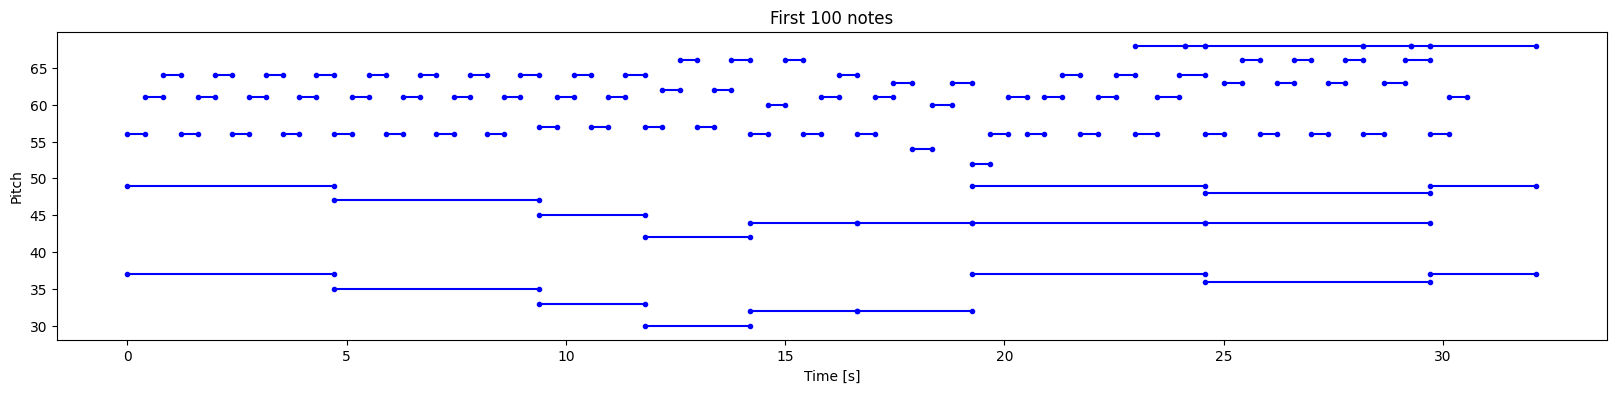

In [ ]:
plot_piano_roll(raw_notes, count=100)

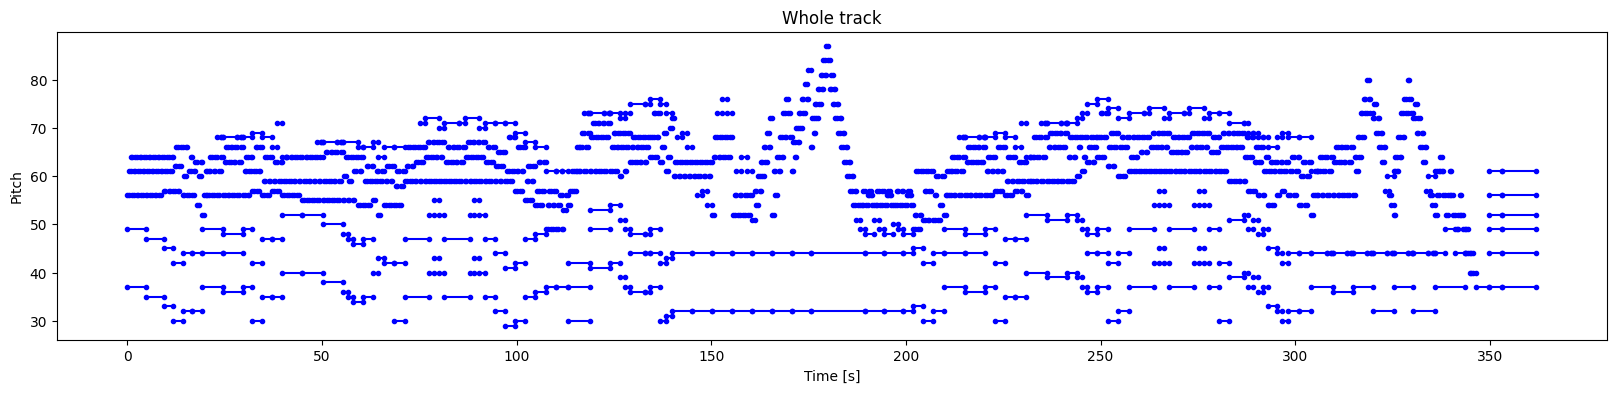

In [ ]:
plot_piano_roll(raw_notes)